In [1]:
# Importing necessary Libraries
from collections import Counter
import pandas as pd
import nltk
import string
import spacy
import collections
from collections import Counter
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_md')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Loading my dataset
df = pd.read_csv('ultimate.csv')

In [3]:
print(df.head())


                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  
0  There is nothing to worry about it, also 74 lo...  Human written  
1  As of my last knowledge update in September 20...   AI Generated  
2  Opensource and proprietary software each come ...  Human written  
3  Both opensource software and proprietary softw...   AI Generated  
4  Artificial intelligence AI is a wideranging br...  Human written  


In [4]:
import pandas as pd

# Loading my dataset

label_mapping = {0: 'Human written', 1: 'AI Generated'}

# Factorizing the "Labels" column and replacing them with the mapped labels
df['Label'], _ = pd.factorize(df['Label'])
df['Label'] = df['Label'].map(label_mapping)


In [5]:
# Defining the function to calculate word frequency distribution
def calculate_word_frequency(text):
    words = text.split()
    word_freq = Counter(words)
    return word_freq

# Applying the function to my DataFrame
df['Word_Frequency'] = df['Answer'].apply(calculate_word_frequency)

In [6]:
print(df.head())

                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  \
0  There is nothing to worry about it, also 74 lo...  Human written   
1  As of my last knowledge update in September 20...   AI Generated   
2  Opensource and proprietary software each come ...  Human written   
3  Both opensource software and proprietary softw...   AI Generated   
4  Artificial intelligence AI is a wideranging br...  Human written   

                                      Word_Frequency  
0  {'There': 1, 'is': 3, 'nothing': 1, 'to': 3, '...  
1  {'As': 2, 'of': 9, 'my': 1, 'last': 1, 'knowle...  
2  {'Opensource': 2, 'and': 17, 'proprietary': 5,...  
3  {'Both': 1, '

In [7]:
# Defining a function to calculate n-gram frequencies
def calculate_ngram_frequency(text, n):
    words = nltk.word_tokenize(text)
    ngram_freq = Counter(ngrams(words, n))
    return ngram_freq

# Applying the function to my DataFrame
n = 4  # we can change n as needed for desired n-grams 
df[f'{n}-gram_Frequency'] = df['Answer'].apply(lambda x: calculate_ngram_frequency(x, n))



In [8]:
print(df.head())


                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  \
0  There is nothing to worry about it, also 74 lo...  Human written   
1  As of my last knowledge update in September 20...   AI Generated   
2  Opensource and proprietary software each come ...  Human written   
3  Both opensource software and proprietary softw...   AI Generated   
4  Artificial intelligence AI is a wideranging br...  Human written   

                                      Word_Frequency  \
0  {'There': 1, 'is': 3, 'nothing': 1, 'to': 3, '...   
1  {'As': 2, 'of': 9, 'my': 1, 'last': 1, 'knowle...   
2  {'Opensource': 2, 'and': 17, 'proprietary': 5,...   
3  {'Both': 

In [9]:
# Defining the function to analyze punctuation usage
from collections import Counter
import string
def analyze_punctuation_usage(text):
    punctuation_freq = Counter(char for char in text if char in string.punctuation)
    return punctuation_freq

# Applying the function to my DataFrame
df['Punctuation_Usage'] = df['Answer'].apply(analyze_punctuation_usage)


In [10]:
print(df.head())

                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  \
0  There is nothing to worry about it, also 74 lo...  Human written   
1  As of my last knowledge update in September 20...   AI Generated   
2  Opensource and proprietary software each come ...  Human written   
3  Both opensource software and proprietary softw...   AI Generated   
4  Artificial intelligence AI is a wideranging br...  Human written   

                                      Word_Frequency  \
0  {'There': 1, 'is': 3, 'nothing': 1, 'to': 3, '...   
1  {'As': 2, 'of': 9, 'my': 1, 'last': 1, 'knowle...   
2  {'Opensource': 2, 'and': 17, 'proprietary': 5,...   
3  {'Both': 

In [11]:
# Defining a function to perform part-of-speech tagging
def perform_pos_tagging(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

# Applying the function to my DataFrame
df['Part_of_Speech_Tags'] = df['Answer'].apply(perform_pos_tagging)

In [12]:
print(df.head())

                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  \
0  There is nothing to worry about it, also 74 lo...  Human written   
1  As of my last knowledge update in September 20...   AI Generated   
2  Opensource and proprietary software each come ...  Human written   
3  Both opensource software and proprietary softw...   AI Generated   
4  Artificial intelligence AI is a wideranging br...  Human written   

                                      Word_Frequency  \
0  {'There': 1, 'is': 3, 'nothing': 1, 'to': 3, '...   
1  {'As': 2, 'of': 9, 'my': 1, 'last': 1, 'knowle...   
2  {'Opensource': 2, 'and': 17, 'proprietary': 5,...   
3  {'Both': 

In [13]:
# Renaming and saving the modified dataset to a .csv file
df.to_csv('combined_ultimate.csv', index=False)

In [14]:

print(df.shape)

(398, 7)


In [16]:
# This code is just to check the shape and first few rows of my dataset before modelling

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv('combined_ultimate.csv')

# Printing the shape of the dataset
print("Shape of the whole dataset:", data.shape)

# Printing the first few rows of the dataset
print(data.head())

# Splitting the dataset into features (X) and labels (y)
X = data[['Word_Frequency', '4-gram_Frequency', 'Punctuation_Usage', 'Part_of_Speech_Tags']]
y = data['Label']

# Print the shape and type of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Type of X:", type(X))
print("Type of y:", type(y))


Shape of the whole dataset: (398, 7)
                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  \
0  There is nothing to worry about it, also 74 lo...  Human written   
1  As of my last knowledge update in September 20...   AI Generated   
2  Opensource and proprietary software each come ...  Human written   
3  Both opensource software and proprietary softw...   AI Generated   
4  Artificial intelligence AI is a wideranging br...  Human written   

                                      Word_Frequency  \
0  Counter({'of': 5, 'the': 5, 'is': 3, 'to': 3, ...   
1  Counter({'and': 14, 'the': 12, 'of': 9, 'to': ...   
2  Counter({'and': 17, 'softwar

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Loading my dataset
data = pd.read_csv('combined_ultimate.csv')

# Implementing Feature Vectorization using TF-IDF for text features
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(data['Answer'])  # Assuming 'Answer' contains the text

# Defining a custom function to convert the 'Word_Frequency' column to a list
def convert_word_frequency(text):
    try:
        return list(eval(text).values())
    except:
        return []

data['Word_Frequency'] = data['Word_Frequency'].apply(convert_word_frequency)

# Defining a custom function to convert the '4-gram_Frequency' column to a list
def convert_4gram_frequency(text):
    try:
        return list(eval(text).values())
    except:
        return []

data['4-gram_Frequency'] = data['4-gram_Frequency'].apply(convert_4gram_frequency)

# Defining a custom function to convert the 'Punctuation_Usage' column to a list
def convert_punctuation_usage(text):
    try:
        return list(eval(text).values())
    except:
        return []

data['Punctuation_Usage'] = data['Punctuation_Usage'].apply(convert_punctuation_usage)

# Defining a custom function to convert the 'Part_of_Speech_Tags' column to a list
def convert_part_of_speech_tags(text):
    try:
        return eval(text)
    except:
        return []

data['Part_of_Speech_Tags'] = data['Part_of_Speech_Tags'].apply(convert_part_of_speech_tags)

# Splitting the 'Punctuation_Usage' and 'Part_of_Speech_Tags' lists into separate columns using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
punctuation_columns = pd.DataFrame(mlb.fit_transform(data['Punctuation_Usage']), columns=mlb.classes_)
pos_columns = pd.DataFrame(mlb.fit_transform(data['Part_of_Speech_Tags']), columns=mlb.classes_)

# Combining the TF-IDF matrix with the new feature columns
X = pd.concat([pd.DataFrame(text_tfidf.toarray()), punctuation_columns, pos_columns], axis=1)

# Defining the target variable
y = data['Label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting labels for the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)




Accuracy: 0.875
Classification Report:
                precision    recall  f1-score   support

 AI Generated       0.84      0.89      0.86        35
Human written       0.91      0.87      0.89        45

     accuracy                           0.88        80
    macro avg       0.87      0.88      0.87        80
 weighted avg       0.88      0.88      0.88        80



In [21]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[31  4]
 [ 6 39]]


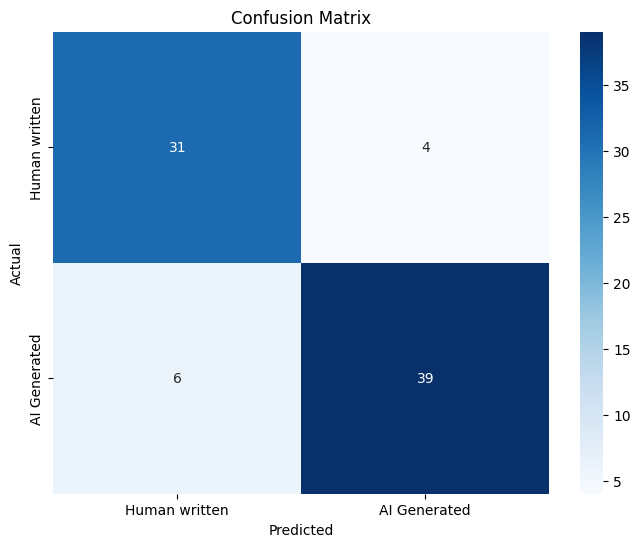

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Human written', 'AI Generated'], 
            yticklabels=['Human written', 'AI Generated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
